In [26]:
# 外國持卡人以信用卡於我國境內支付各產業類別詐欺交易型態
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
df= pd.read_csv('german_credit_data.csv') #指定欄位
data = df.drop(columns=['Unnamed: 0'] ,inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [42]:
# 資料欄位類型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [44]:
# 是否有缺失值
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [53]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

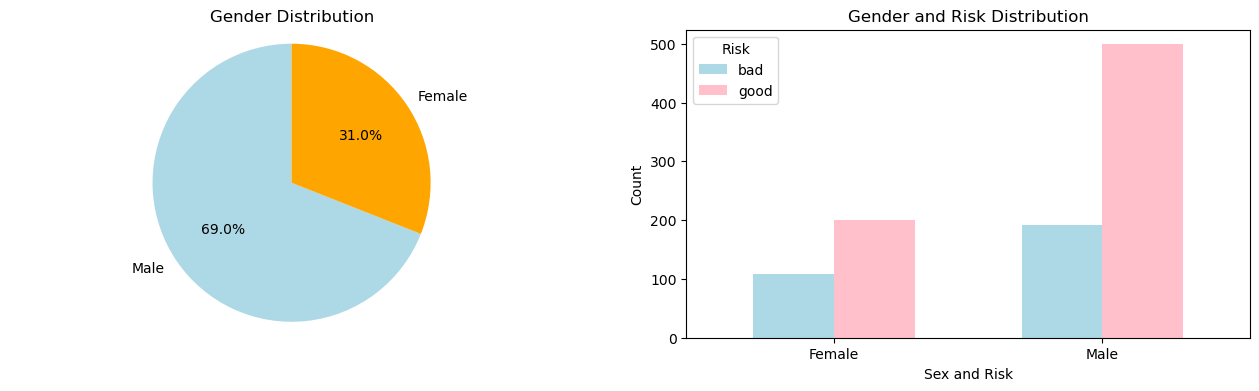

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# 第一個圖表 pie chart
male_count = df.groupby('Sex').size()['male']
female_count = df.groupby('Sex').size()['female']
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['Lightblue', 'orange']
ax[0].pie([male_count, female_count], labels=['Male', 'Female'], colors=['lightblue', 'orange'], autopct='%1.1f%%', startangle=90)
ax[0].axis('equal') 
ax[0].set_title('Gender Distribution')

# 第二個圖表 bar chart
gender_risk_counts = df.groupby(['Sex', 'Risk']).size().unstack()
gender_risk_counts.plot(kind='bar', ax=ax[1], color=['lightblue', 'pink'], width=0.6)
ax[1].set_xlabel('Sex and Risk')
ax[1].set_ylabel('Count')
ax[1].set_title('Gender and Risk Distribution')
ax[1].set_xticklabels(['Female', 'Male'], rotation=0)
# for i in ax[1].patches:
#     height = i.get_height()
#     ax[1].annotate(f'{height}', xy=(i.get_x() + i.get_width() / 2, height), xytext=(0, 3),
#                    textcoords="offset points", ha='center', va='bottom')

In [231]:
male_count = df[df['Sex'] == 'male'].shape[0]
female_count = df[df['Sex'] == 'female'].shape[0]

print("Male count:", male_count)
print("Female count:", female_count)


Male count: 690
Female count: 310


In [241]:
gender_risk_counts

Risk,bad,good
Sex,,
female,109,201
male,191,499


<AxesSubplot:xlabel='Age', ylabel='Count'>

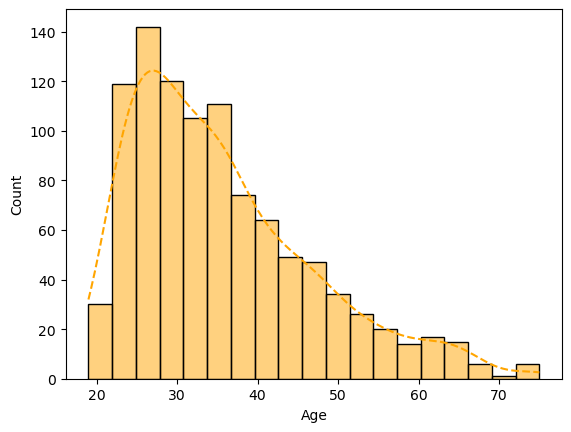

In [105]:
# 添加密度曲線
# sns.histplot(x=df["Age"], kde=True, palette='skyblue', data=df)
sns.histplot(x=df["Age"], kde=True, color='orange', line_kws={'linestyle':'dashed'}, data=df)


In [13]:
age_group =[]
age_count = {'Student': 0, 'Young': 0, 'Adult': 0, 'Middle-aged':0,'Senior': 0}
for age in df['Age']:
    if age <= 20:
        age_range = 'Student'
    elif age > 20 and age <= 30:
        age_range = 'Young'
    elif age > 30 and age <= 40:
        age_range = 'Adult'
    elif age > 41 and age <= 50:
        age_range = 'Middle-aged'        
    else:
        age_range = 'Senior'
    age_count[age_range] += 1
    age_group.append(age_range)

print(age_count)


{'Student': 16, 'Young': 395, 'Adult': 315, 'Middle-aged': 144, 'Senior': 130}


In [14]:
# print(age_group)
df['Age_Group'] = age_group
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Middle-aged
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Middle-aged
4,53,male,2,free,little,little,4870,24,car,bad,Senior
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Adult
996,40,male,3,own,little,little,3857,30,car,good,Adult
997,38,male,2,own,little,NaN,804,12,radio/TV,good,Adult
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Young


<AxesSubplot:xlabel='Age_Group', ylabel='Credit amount'>

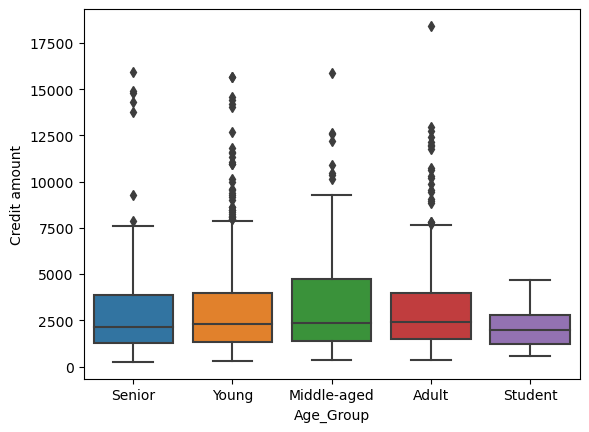

In [15]:
sns.boxplot(x='Age_Group', y='Credit amount', data=df)

In [16]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

In [176]:
ct = pd.crosstab(df.Risk, df.Housing)
ct

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


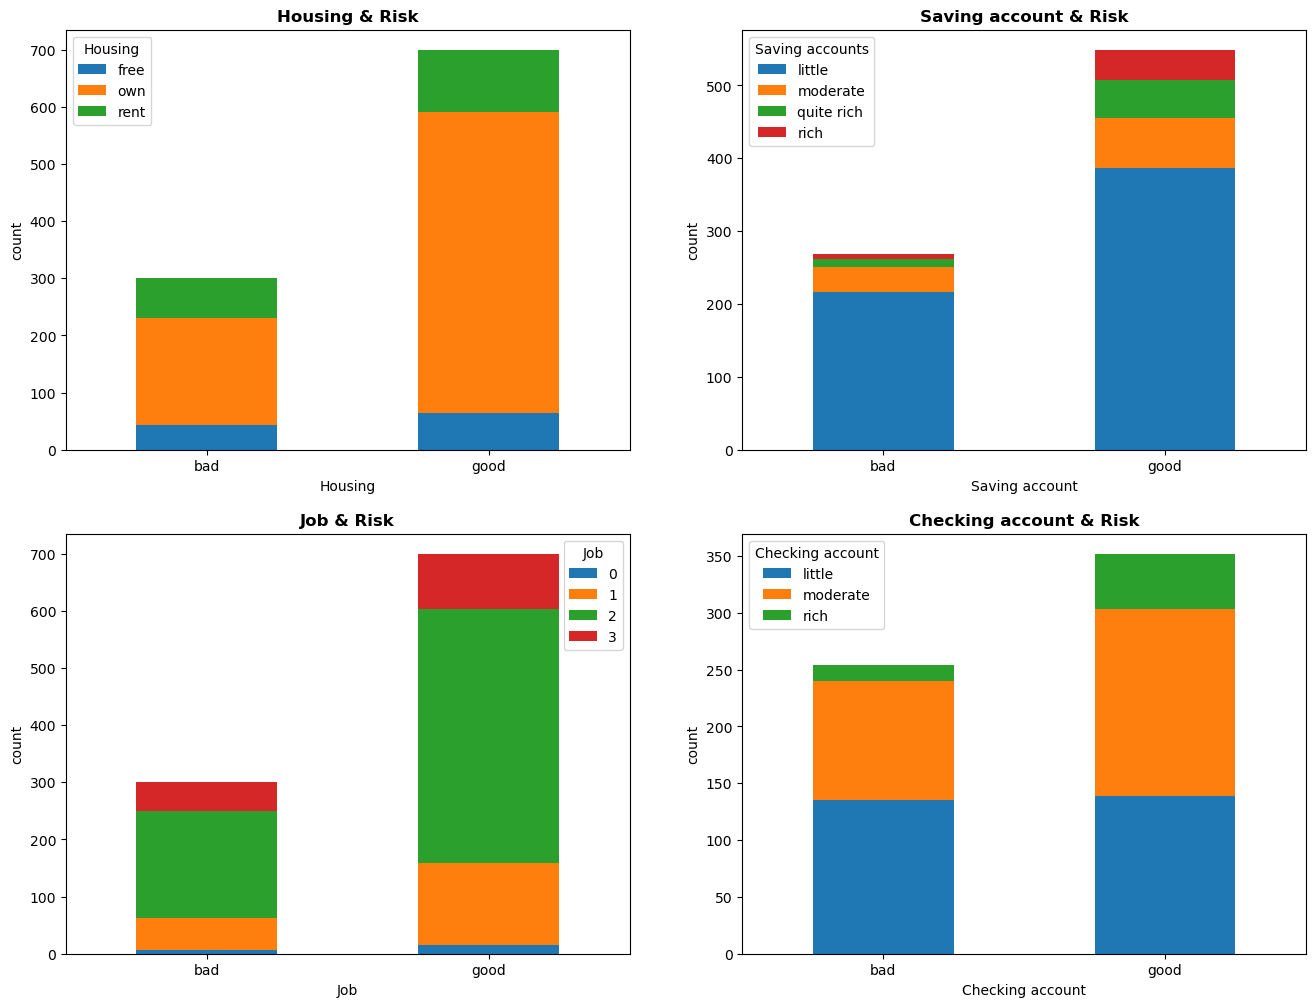

In [206]:
# Housing & Risk
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
ct1 = pd.crosstab(df.Risk, df.Housing)
ct1.plot.bar(ax=ax[0, 0], stacked=True)
ax[0, 0].set_xlabel("Housing")
ax[0, 0].set_ylabel("count")
ax[0, 0].set_title("Housing & Risk",fontweight='bold')
ax[0, 0].set_xticklabels(['bad', 'good'], rotation=0)

# Job & Risk
ct2 = pd.crosstab(df['Risk'], df['Saving accounts'])
ct2.plot.bar(ax=ax[0, 1], stacked=True)
ax[0, 1].set_xlabel("Saving account")
ax[0, 1].set_ylabel("count")
ax[0, 1].set_title("Saving account & Risk",fontweight='bold')
ax[0, 1].set_xticklabels(['bad', 'good'], rotation=0)

ct3 = pd.crosstab(df['Risk'], df['Job'])
ct3.plot.bar(ax=ax[1, 0], stacked=True)
ax[1, 0].set_xlabel("Job")
ax[1, 0].set_ylabel("count")
ax[1, 0].set_title("Job & Risk",fontweight='bold')
ax[1, 0].set_xticklabels(['bad', 'good'], rotation=0)

ct4 = pd.crosstab(df['Risk'], df['Checking account'])
ct4.plot.bar(ax=ax[1, 1], stacked=True)
ax[1, 1].set_xlabel("Checking account")
ax[1, 1].set_ylabel("count")
ax[1, 1].set_title("Checking account & Risk",fontweight='bold')
ax[1, 1].set_xticklabels(['bad', 'good'], rotation=0)

plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
labelencoder = LabelEncoder()
for column in df.columns:
    df_Encoder[column] = labelencoder.fit_transform(df_Encoder[column])
df_Encoder

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,48,1,2,1,4,0,142,2,5,1,2
1,3,0,2,1,0,1,770,29,5,0,4
2,30,1,1,1,0,3,390,8,3,1,1
3,26,1,2,0,0,0,848,26,4,1,1
4,34,1,2,0,0,0,734,17,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
995,12,0,1,1,0,3,310,8,4,1,0
996,21,1,3,1,0,0,661,21,1,1,0
997,19,1,2,1,0,3,69,8,5,1,0
998,4,1,2,0,0,0,332,27,5,0,4


Text(0.5, 1.0, 'Person Correlation')

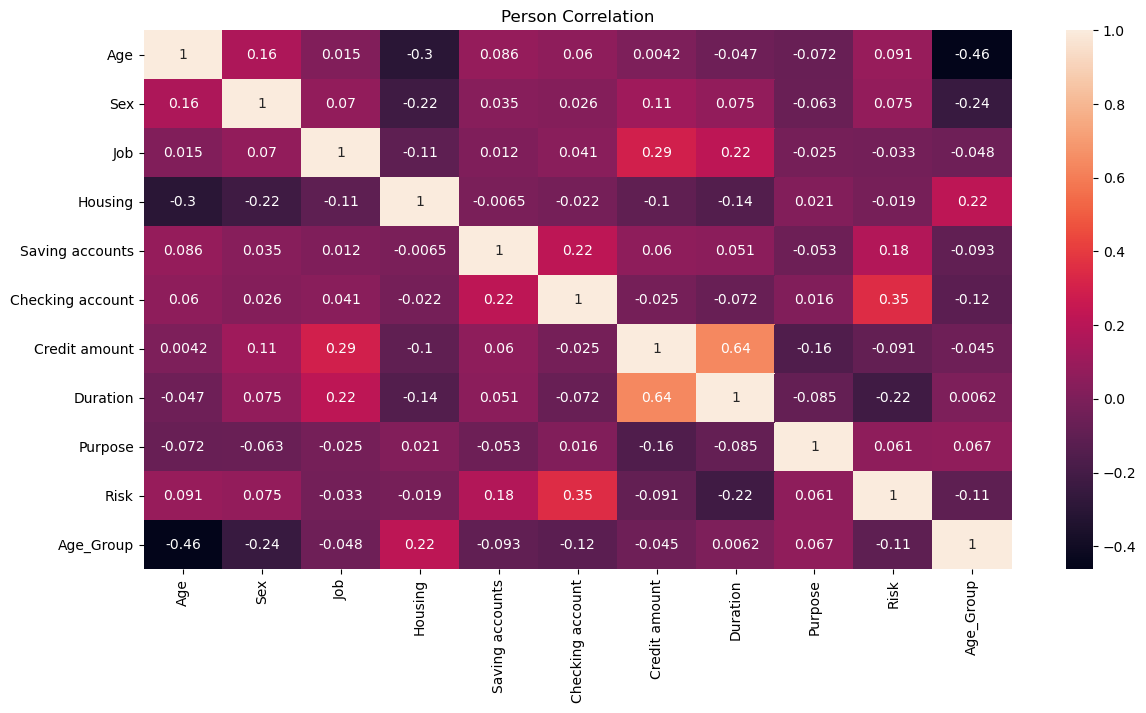

In [220]:
# 熱力圖
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Person Correlation")


In [209]:
df_dummies = pd.get_dummies(df)
df_dummies

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,Age_Group_Adult,Age_Group_Middle-aged,Age_Group_Senior,Age_Group_Student,Age_Group_Young
0,67,2,1169,6,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,53,2,4870,24,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
996,40,3,3857,30,0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
997,38,2,804,12,0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0
998,23,2,1845,45,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [328]:
# Model1: Decision Tree
from sklearn.model_selection import train_test_split
x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']
X_train,X_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
DecisionTree_Model = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)
# 使用訓練資料，訓練模型
DecisionTree_Model.fit(X_train, y_train)
# 使用訓練資料，預測分類
predicted = DecisionTree_Model.predict(X_train)
# 計算準確率
Decision_train_accuracy = DecisionTree_Model.score(X_train, y_train)
Decision_test_accuracy = DecisionTree_Model.score(X_test, y_test)
print("M1訓練準確度:", Decision_train_accuracy)
print("M1測試準確度:", Decision_test_accuracy)


M1訓練準確度: 0.8285714285714286
M1測試準確度: 0.6933333333333334


In [331]:
# from sklearn.metrics import roc_curve, auc
# y_pred_proba = DecisionTree_Model.predict_proba(x_test)[:, 1]
# # 計算ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# # 計算ROC面積
# roc_auc = auc(fpr, tpr)

# # 繪製曲顯
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [323]:
# # 繪製樹
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,10))
# plot_tree(decisionTree_Model, filled=True, feature_names=x.columns, class_names=['bad', 'good'])
# plt.show()

In [326]:
# Model2: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# 設定迭代次數(因無法收斂)
Logistic_Model=linear_model.LogisticRegression(max_iter=500)
Logistic_Model.fit(x_train, y_train)

Logistic_train_accuracy = Logistic_Model.score(X_train, y_train)
Logistic_test_accuracy = Logistic_Model.score(X_test, y_test)
print("M2訓練準確度:", Logistic_train_accuracy)
print("M2測試準確度:", Logistic_test_accuracy)


M2訓練準確度: 0.7385714285714285
M2測試準確度: 0.7333333333333333


In [332]:
# from sklearn.metrics import roc_curve, auc
# y_pred_proba = Logistic_Model.predict_proba(x_test)[:, 1]
# # 計算ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# # 計算ROC面積
# roc_auc = auc(fpr, tpr)

# # 繪製曲顯
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [340]:
# Model3: Random Forest
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model = RandomForestClassifier(n_estimators=20, criterion = 'gini',random_state=42)

X=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']

x_train,x_test,y_train,y_test=train_test_split(X, y, shuffle=True, random_state=42, test_size=0.3)

RandomForest_Model.fit(X_train, y_train)

RandomForest_train_accuracy = RandomForest_Model.score(X_train, y_train)
RandomForest_test_accuracy = RandomForest_Model.score(X_test, y_test)
print("M3訓練準確度:", RandomForest_train_accuracy)
print("M3測試準確度:", RandomForest_test_accuracy)

# predicted = RandomForestModel.predict(x_train)
# predicted

M3訓練準確度: 0.9957142857142857
M3測試準確度: 0.73


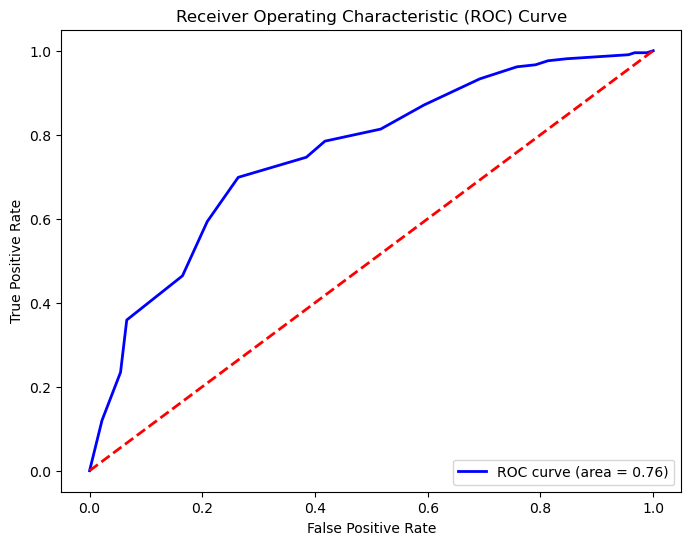

In [341]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = RandomForest_Model.predict_proba(x_test)[:, 1]
# 計算ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 計算ROC面積
roc_auc = auc(fpr, tpr)

# 繪製曲顯
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Model4: svm
from sklearn import svm
from sklearn.model_selection import train_test_split

x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']

X_train,X_test,y_train,y_test=train_test_split(x, y, shuffle=True, random_state=42, test_size=0.3)

SVM_Model=svm.SVC(kernel='rbf',C=1,gamma='auto')
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)

SVM_train_accuracy = SVM_Model.score(X_train, y_train)
SVM_test_accuracy = SVM_Model.score(X_test, y_test)

print("M4訓練準確度:", SVM_train_accuracy)
print("M4測試準確度:", SVM_test_accuracy)


M4訓練準確度: 0.9971428571428571
M4測試準確度: 0.6966666666666667


In [40]:
# Model5: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42)

KNN_Model=KNeighborsClassifier(n_neighbors=3,p=2,weights='distance',algorithm='brute')
KNN_Model.fit(X_train,y_train)

KNN_Model.predict(X_test)
KNN_Model.score(X_test,y_test)

KNN_train_accuracy = KNN_Model.score(X_train, y_train)
KNN_test_accuracy = KNN_Model.score(X_test, y_test)
print("M5訓練準確度:", KNN_train_accuracy)
print("M5測試準確度:", KNN_test_accuracy)

M5訓練準確度: 1.0
M5測試準確度: 0.6133333333333333


In [ ]:
# Summary:Imbalanced Data

In [46]:
# Imbalanced Data: 使用SMOTE
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.model_selection import train_test_split

x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']

X_train,X_test,y_train,y_test=train_test_split(x, y, shuffle=True, random_state=42, test_size=0.3)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

SVM_Model=svm.SVC(kernel='rbf',C=1,gamma='auto')
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)

SVM_train_accuracy = SVM_Model.score(X_train, y_train)
SVM_test_accuracy = SVM_Model.score(X_test, y_test)
print("M4訓練準確度:", SVM_train_accuracy)
print("M4測試準確度:", SVM_test_accuracy)

M4訓練準確度: 1.0
M4測試準確度: 0.67


In [48]:
# Imbalanced Data:使用上採樣+下採樣
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

x=df_Encoder.drop(['Risk'],axis=1)
y=df_Encoder['Risk']

X_train,X_test,y_train,y_test=train_test_split(x, y, shuffle=True, random_state=42, test_size=0.3)
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

SVM_Model=svm.SVC(kernel='rbf',C=1,gamma='auto')
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)

SVM_train_accuracy = SVM_Model.score(X_train, y_train)
SVM_test_accuracy = SVM_Model.score(X_test, y_test)
print("M4訓練準確度:", SVM_train_accuracy)
print("M4測試準確度:", SVM_test_accuracy)


M4訓練準確度: 1.0
M4測試準確度: 0.6966666666666667
